In [1]:

# LABORATORIO 1: EDA y Pipeline Reproducible con Datos Clínicos Oncológicos
# pipeline reproducible para el análisis exploratorio
# de datos (EDA) con un enfoque en la calidad, limpieza y transformación de datos.Lab 1.


# 1. Importación de Librerías (I - Información / RA2)
# Aquí importamos todas las librerías necesarias para la carga, manipulación,
# análisis y visualización de datos.

import pandas as pd     # Para manipulación de DataFrames (como una hoja de Excel)
import numpy as np      # Para operaciones numéricas, útil para NaNs (valores nulos)
import matplotlib.pyplot as plt # Para visualización de datos estática
import seaborn as sns   # Para visualizaciones estadísticas más atractivas
import warnings         # Para manejar advertencias que puedan surgir
warnings.filterwarnings('ignore') # Ignoramos advertencias para una salida más limpia

In [2]:
# Configuramos el estilo de los gráficos para que sean consistentes y legibles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño por defecto para las figuras

print("Librerías cargadas correctamente. ¡Estamos listos para empezar!") # Mensaje de confirmación

Librerías cargadas correctamente. ¡Estamos listos para empezar!


In [3]:
import pandas as pd
# from google.colab import files

# Subir archivo manualmente
# uploaded = files.upload()

# Verifica el nombre exacto del archivo que subiste
#for fn in uploaded.keys():
#    print("Archivo subido:", fn)

# Leer el archivo (ajusta el nombre según el que se subió)
df = pd.read_csv("paired_bladder_2022_clinical_data.tsv", sep="\t")

# Mostrar primeras filas
df.head()


,Study ID,Patient ID,Sample ID,Age at Diagnosis,Age at Which Sequencing was Reported (Years),Cancer Type,Cancer Type Detailed,Ethnicity Category,Fraction Genome Altered,Gene Panel,...,Sample coverage,Sample Type,Sex,Smoker,Somatic Status,Specimen Stage,Systemic Treatment,TMB (nonsynonymous),Tumor Purity,Treatment between Pri-Met sample collection
0,paired_bladder_2022,P-0000034,P-0000034-T01-IM3,75.0,78,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.1591,IMPACT341,...,461.0,Primary,Male,Former,Matched,4.0,1,13.309864,40,NaN
1,paired_bladder_2022,P-0000043,P-0000043-T02-IM3,50.0,58,Bladder Cancer,Bladder Urothelial Carcinoma,NaN,0.4515,IMPACT341,...,833.0,Metastasis,NaN,Active,Matched,4.0,1,29.947193,50,NaN
2,paired_bladder_2022,P-0000056,P-0000056-T01-IM3,57.0,60,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.0689,IMPACT341,...,1004.0,Primary,Male,Active,Matched,3.0,1,5.545777,60,NaN
3,paired_bladder_2022,P-0000063,P-0000063-T01-IM3,61.0,63,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.5047,IMPACT341,...,900.0,Primary,Male,Never,Matched,3.0,1,15.528174,70,NaN
4,paired_bladder_2022,P-0000068,P-0000068-T01-IM3,77.0,80,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.0052,IMPACT341,...,973.0,Metastasis,Male,Former,Matched,4.0,0,3.327466,20,NaN


********************* PARA REGRESION LINEAL MULTIPLE****

In [4]:
# Leer el archivo con el nombre correcto
df = pd.read_csv("paired_bladder_2022_clinical_data.tsv", sep="\t")

# Ver las primeras filas del dataset
print(df.head())

# Ver la estructura del dataset
print(df.info())

              Study ID Patient ID          Sample ID  Age at Diagnosis  \
0  paired_bladder_2022  P-0000034  P-0000034-T01-IM3              75.0   
1  paired_bladder_2022  P-0000043  P-0000043-T02-IM3              50.0   
2  paired_bladder_2022  P-0000056  P-0000056-T01-IM3              57.0   
3  paired_bladder_2022  P-0000063  P-0000063-T01-IM3              61.0   
4  paired_bladder_2022  P-0000068  P-0000068-T01-IM3              77.0   

  Age at Which Sequencing was Reported (Years)     Cancer Type  \
0                                           78  Bladder Cancer   
1                                           58  Bladder Cancer   
2                                           60  Bladder Cancer   
3                                           63  Bladder Cancer   
4                                           80  Bladder Cancer   

           Cancer Type Detailed         Ethnicity Category  \
0  Bladder Urothelial Carcinoma  Non-Spanish; Non-Hispanic   
1  Bladder Urothelial Carcinoma   

In [5]:
# Verificar si hay valores nulos en el dataset
print(df.isnull().sum())

# Calcular el porcentaje de valores nulos por columna
na_percent = df.isnull().mean() * 100
print(na_percent)

# Filtrar las columnas con menos del 5% de valores faltantes
columns_with_less_than_5_na = na_percent[na_percent < 5].index
df_cleaned = df[columns_with_less_than_5_na]

# Ver las primeras filas del dataset limpio
print(df_cleaned.head())


Study ID                                           0
Patient ID                                         0
Sample ID                                          0
Age at Diagnosis                                 387
Age at Which Sequencing was Reported (Years)     153
Cancer Type                                        0
Cancer Type Detailed                               0
Ethnicity Category                                12
Fraction Genome Altered                          133
Gene Panel                                         0
Intravesical Treatment                           346
Met Location                                    1366
Metastatic Site                                 1340
MSI Score                                         27
MSI Type                                         158
Mutation Count                                    38
Oncotree Code                                      0
Overall Survival (Months)                         77
Overall Survival Status                       

In [6]:
# Calcular el porcentaje de valores faltantes por columna
missing_percent = df.isnull().mean() * 100

# Filtrar las columnas con menos del 5% de valores faltantes
columns_with_less_than_5_na = missing_percent[missing_percent < 5].index

# Crear un nuevo dataset solo con las columnas que tienen menos del 5% de valores faltantes
df_filtered = df[columns_with_less_than_5_na]

# Ver el número de filas y columnas del nuevo dataset
print(f"Filas y columnas del dataset filtrado: {df_filtered.shape}")

# Ver las primeras filas del nuevo dataset
print(df_filtered.head())

# Ver el porcentaje de valores faltantes por columna en el dataset filtrado
missing_percent_filtered = df_filtered.isnull().mean() * 100
print(f"Porcentaje de NA por columna en el dataset filtrado:\n{missing_percent_filtered}")


Filas y columnas del dataset filtrado: (1659, 23)
              Study ID Patient ID          Sample ID     Cancer Type  \
0  paired_bladder_2022  P-0000034  P-0000034-T01-IM3  Bladder Cancer   
1  paired_bladder_2022  P-0000043  P-0000043-T02-IM3  Bladder Cancer   
2  paired_bladder_2022  P-0000056  P-0000056-T01-IM3  Bladder Cancer   
3  paired_bladder_2022  P-0000063  P-0000063-T01-IM3  Bladder Cancer   
4  paired_bladder_2022  P-0000068  P-0000068-T01-IM3  Bladder Cancer   

           Cancer Type Detailed         Ethnicity Category Gene Panel  \
0  Bladder Urothelial Carcinoma  Non-Spanish; Non-Hispanic  IMPACT341   
1  Bladder Urothelial Carcinoma                        NaN  IMPACT341   
2  Bladder Urothelial Carcinoma  Non-Spanish; Non-Hispanic  IMPACT341   
3  Bladder Urothelial Carcinoma  Non-Spanish; Non-Hispanic  IMPACT341   
4  Bladder Urothelial Carcinoma  Non-Spanish; Non-Hispanic  IMPACT341   

   MSI Score  Mutation Count Oncotree Code  ...  Primary Tumor Site  \
0      

In [8]:
# Revisa los tipos de datos de todas las columnas
print(df.dtypes)

# Revisa si hay valores infinitos o NaN en el dataframe
print(df.isna().sum())  # Muestra la cantidad de valores faltantes

# Verifica si hay valores infinitos
print((df == float('inf')).sum())

# Reemplazar 'inf' con NaN si los encuentras
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Imputar valores faltantes
# Para columnas numéricas, imputar con la media
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

# Para columnas categóricas, imputar con la moda
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Revisa nuevamente los valores faltantes después de imputar
print(df.isna().sum())


Study ID                                         object
Patient ID                                       object
Sample ID                                        object
Age at Diagnosis                                float64
Age at Which Sequencing was Reported (Years)     object
Cancer Type                                      object
Cancer Type Detailed                             object
Ethnicity Category                               object
Fraction Genome Altered                         float64
Gene Panel                                       object
Intravesical Treatment                           object
Met Location                                     object
Metastatic Site                                  object
MSI Score                                       float64
MSI Type                                         object
Mutation Count                                  float64
Oncotree Code                                    object
Overall Survival (Months)                       

In [9]:
# Paso 1: Eliminar columnas con más del 5% de valores faltantes
threshold = 0.05  # 5% de valores faltantes
df_cleaned = df.dropna(thresh=int((1-threshold) * len(df)), axis=1)

# Ver el dataset después de eliminar las columnas con más del 5% de valores faltantes
print(f"Filas y columnas después de eliminar: {df_cleaned.shape}")
print("\nPorcentaje de valores faltantes por columna después de eliminar:")
print(df_cleaned.isna().sum() / len(df_cleaned) * 100)

# Paso 2: Imputar valores faltantes para columnas numéricas (media) y categóricas (moda)

# Imputar las columnas numéricas con la media
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

# Imputar las columnas categóricas con la moda
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Ver el porcentaje de NAs después de imputar
print("\nPorcentaje de valores faltantes después de imputar:")
print(df_cleaned.isna().sum() / len(df_cleaned) * 100)

# Ver las primeras filas del dataset limpio
print("\nPrimeras filas del dataset imputado:")
print(df_cleaned.head())


Filas y columnas después de eliminar: (1659, 35)

Porcentaje de valores faltantes por columna después de eliminar:
Study ID                                        0.0
Patient ID                                      0.0
Sample ID                                       0.0
Age at Diagnosis                                0.0
Age at Which Sequencing was Reported (Years)    0.0
Cancer Type                                     0.0
Cancer Type Detailed                            0.0
Ethnicity Category                              0.0
Fraction Genome Altered                         0.0
Gene Panel                                      0.0
Intravesical Treatment                          0.0
Met Location                                    0.0
Metastatic Site                                 0.0
MSI Score                                       0.0
MSI Type                                        0.0
Mutation Count                                  0.0
Oncotree Code                                   0.0
O

In [10]:
print(f"Filas y columnas después de eliminar columnas con más del 5% de valores faltantes: {df_cleaned.shape}")


Filas y columnas después de eliminar columnas con más del 5% de valores faltantes: (1659, 35)


In [11]:
# Ver las primeras filas del dataset imputado
print("\nPrimeras filas del dataset imputado:")
print(df_cleaned.head())



Primeras filas del dataset imputado:
              Study ID Patient ID          Sample ID  Age at Diagnosis  \
0  paired_bladder_2022  P-0000034  P-0000034-T01-IM3              75.0   
1  paired_bladder_2022  P-0000043  P-0000043-T02-IM3              50.0   
2  paired_bladder_2022  P-0000056  P-0000056-T01-IM3              57.0   
3  paired_bladder_2022  P-0000063  P-0000063-T01-IM3              61.0   
4  paired_bladder_2022  P-0000068  P-0000068-T01-IM3              77.0   

  Age at Which Sequencing was Reported (Years)     Cancer Type  \
0                                           78  Bladder Cancer   
1                                           58  Bladder Cancer   
2                                           60  Bladder Cancer   
3                                           63  Bladder Cancer   
4                                           80  Bladder Cancer   

           Cancer Type Detailed         Ethnicity Category  \
0  Bladder Urothelial Carcinoma  Non-Spanish; Non-Hispanic

In [12]:
# Verificar si hay valores faltantes
missing_values = df_cleaned.isna().sum()
print("\nValores faltantes por columna después de imputar:")
print(missing_values)



Valores faltantes por columna después de imputar:
Study ID                                        0
Patient ID                                      0
Sample ID                                       0
Age at Diagnosis                                0
Age at Which Sequencing was Reported (Years)    0
Cancer Type                                     0
Cancer Type Detailed                            0
Ethnicity Category                              0
Fraction Genome Altered                         0
Gene Panel                                      0
Intravesical Treatment                          0
Met Location                                    0
Metastatic Site                                 0
MSI Score                                       0
MSI Type                                        0
Mutation Count                                  0
Oncotree Code                                   0
Overall Survival (Months)                       0
Overall Survival Status                         0

In [29]:
import statsmodels.api as sm

# Selección de las variables para el modelo (sin 'Tumor Purity')
columns_for_model = ['MSI Score', 'Mutation Count', 'Sample coverage', 'Sample Type']

# Seleccionar las columnas para las variables independientes (X) y la dependiente (y)
X = df_cleaned[columns_for_model].copy()
y = df_cleaned['TMB (nonsynonymous)'].copy()

# Codificar 'Sample Type' como variable categórica (one-hot encoding)
X = pd.get_dummies(X, columns=['Sample Type'], drop_first=True)

# Convertir todas las columnas booleanas a enteros (0 y 1)
X = X.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

# Convertir todo a numérico
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Eliminar filas con NaN en X o y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

X = sm.add_constant(X)
model_tmb = sm.OLS(y, X)
results_tmb = model_tmb.fit()
print(results_tmb.summary())

                             OLS Regression Results                            
Dep. Variable:     TMB (nonsynonymous)   R-squared:                       0.861
Model:                             OLS   Adj. R-squared:                  0.861
Method:                  Least Squares   F-statistic:                     1466.
Date:                 Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                         23:14:50   Log-Likelihood:                -5884.4
No. Observations:                 1659   AIC:                         1.178e+04
Df Residuals:                     1651   BIC:                         1.183e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

In [31]:
# Seleccionar solo las columnas numéricas para X (independientes)
X = df_cleaned[numeric_columns].drop('TMB (nonsynonymous)', axis=1)

# Convertir todas las columnas de X a tipo numérico si es necesario
X = X.apply(pd.to_numeric, errors='coerce')

# Seleccionar la variable dependiente TMB (nonsynonymous) para y
y = df_cleaned['TMB (nonsynonymous)']
y = pd.to_numeric(y, errors='coerce')

# Eliminar filas con NaN en X o y
X = X.dropna()
y = y[X.index]

# Añadir la constante para el intercepto en el modelo
X = sm.add_constant(X)

# Crear y ajustar el modelo
model_tmb = sm.OLS(y, X)
results_tmb = model_tmb.fit()

# Mostrar el resumen del modelo
print(results_tmb.summary())

# Calcular el VIF para cada variable en el modelo
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [(X.values, i) for i in range(X.shape[1])]

# Mostrar el VIF
print("\nVIF para cada variable:")
print(vif_data)


                             OLS Regression Results                            
Dep. Variable:     TMB (nonsynonymous)   R-squared:                       0.877
Model:                             OLS   Adj. R-squared:                  0.877
Method:                  Least Squares   F-statistic:                     1472.
Date:                 Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                         23:15:51   Log-Likelihood:                -5784.7
No. Observations:                 1659   AIC:                         1.159e+04
Df Residuals:                     1650   BIC:                         1.164e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
cons

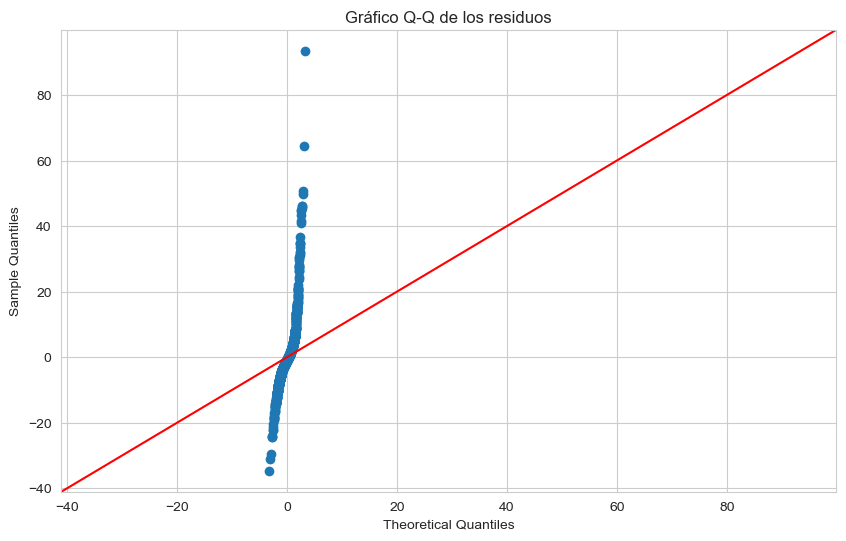

In [32]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Obtener los residuos del modelo ajustado
residuals = results_tmb.resid

# Crear el gráfico Q-Q
sm.qqplot(residuals, line ='45')
plt.title("Gráfico Q-Q de los residuos")
plt.show()


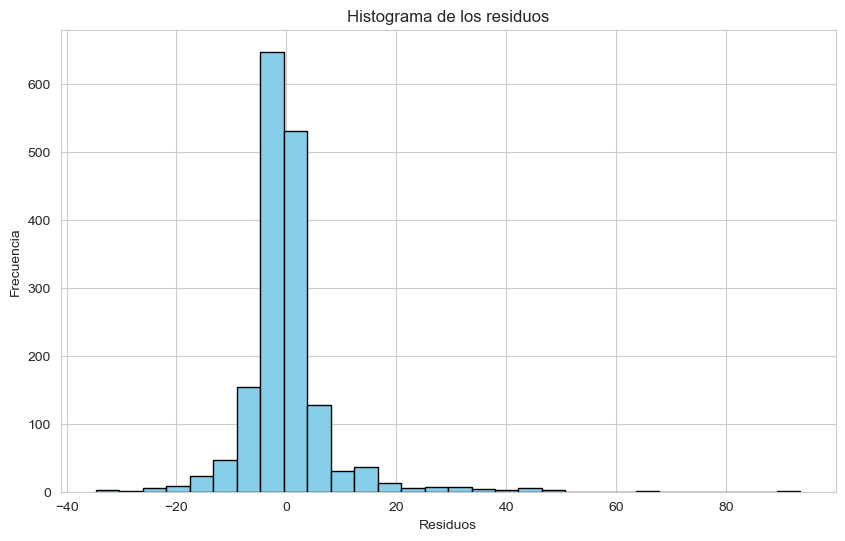

In [33]:
import matplotlib.pyplot as plt

# Obtener los residuos del modelo ajustado
residuals = results_tmb.resid

# Crear el histograma de los residuos
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')
plt.title("Histograma de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
#Modelo cox

# Instalación (si no lo tienes en tu Colab o entorno)
#!pip install lifelines
#!pip install Jinja2

# Importamos librerías
import pandas as pd
from lifelines import CoxPHFitter

# 1. Cargar un dataset de ejemplo (Rossi: reincidencia de presos)
df = df_cleaned



# 2. Crear el modelo de Cox
cph = CoxPHFitter()

# Ajustar el modelo con las variables
#cph.fit(df, duration_col='Overall Survival (Months)', event_col='Overall Survival Status')

# 3. Resumen del modelo
#cph.print_summary()

# 4. Graficar los efectos de las variables
#cph.plot()

df['Overall Survival Status'].unique()

df['Overall Survival Status'] = df['Overall Survival Status'].map({'1:DECEASED': 1.0, '0:LIVING': 0})

df.describe()

,Age at Diagnosis,Fraction Genome Altered,MSI Score,Mutation Count,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample coverage,Specimen Stage,TMB (nonsynonymous)
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,0.0,1659.000000,1659.000000,1659.000000,1659.000000
mean,65.165881,0.180792,0.645937,14.474399,32.630613,NaN,1.665461,693.682203,2.892612,15.965241
std,9.867701,0.169916,2.576126,22.701851,24.045774,NaN,0.948407,320.364763,0.662569,22.565535
min,0.000000,0.000000,-1.000000,1.000000,0.000000,NaN,1.000000,57.000000,1.000000,0.000000
25%,61.000000,0.036900,0.000000,6.000000,13.085000,NaN,1.000000,512.500000,2.892612,5.872318
50%,65.165881,0.152800,0.160000,10.000000,30.411000,NaN,1.000000,639.000000,3.000000,10.376377
75%,71.000000,0.271950,0.645938,16.000000,43.413500,NaN,2.000000,780.500000,3.000000,19.023358
max,92.000000,0.954500,42.110000,469.000000,104.877000,NaN,6.000000,2641.000000,4.000000,404.678709
